In [19]:
import pandas as pd
df = pd.read_pickle("../../data/dataset_subset_2003-2011.pkl")

In [20]:
df.columns

Index(['lat', 'lon', 'time', 'agb', 'pft_fracCover', 'sm', 'pftCrop',
       'pftHerb', 'pftShrubBD', 'pftShrubNE', 'pftTreeBD', 'pftTreeBE',
       'pftTreeND', 'pftTreeNE', 'GDP', 'ign', 'Distance_to_populated_areas',
       'fPAR', 'LAI', 'NLDI', 'vod_K_anomalies', 'FPAR_12mon', 'LAI_12mon',
       'Vod_k_anomaly_12mon', 'FPAR_06mon', 'LAI_06mon', 'Vod_k_anomaly_06mon',
       'WDPA_fracCover', 'dtr', 'pet', 'tmx', 'wet', 'Biome', 'precip',
       'Livestock', 'road_density', 'topo', 'pop_density'],
      dtype='object')

In [22]:
precip_temp = df[['lat','lon','time','tmx','precip']]

In [23]:
pd.to_pickle(precip_temp,"../../data/precip_temp.pkl")

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Load the CSV file
df = precip_temp

# Group the dataframe by 'lat' and 'lon'
grouped = df.groupby(['lat', 'lon'])

# Parameters for Savitzky-Golay filter
window_length = 5
polyorder = 3

# Iterate over each group
for (lat, lon), group in grouped:
    # Extract the temperature values for the current group
    temps = group['tmx'].values

    # Smooth the temperature values using Savitzky-Golay filter
    smooth_curve = savgol_filter(temps, window_length=window_length, polyorder=polyorder)

    # Calculate the detrended curve (subtract the smooth curve from the temperature values)
    detrended_curve = temps - smooth_curve

    # Plot the detrended curve for visualization
    df.loc[group.index, 'temp_a'] = detrended_curve

    # Extract the temperature values for the current group
    precip = group['precip'].values

    # Smooth the temperature values using Savitzky-Golay filter
    smooth_curve = savgol_filter(precip, window_length=window_length, polyorder=polyorder)

    # Calculate the detrended curve (subtract the smooth curve from the temperature values)
    detrended_curve = precip - smooth_curve

    # Plot the detrended curve for visualization
    df.loc[group.index, 'precip_a'] = detrended_curve

    

In [34]:
df.columns

Index(['lat', 'lon', 'time', 'tmx', 'precip', 'detrended_temp', 'temp_a',
       'precip_a'],
      dtype='object')

In [35]:
df.to_pickle("../../data/anomaly.pkl")

In [2]:
from netCDF4 import Dataset
df = Dataset("../../data/0009.nc")

In [4]:
print(df)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    id: 0009.nc
    date_created: 2020-09-21 20:15:44
    featureType: timeSeries
    product: ERA5-LAND (from netcdf)
    geospatial_lat_min: -44.0
    geospatial_lat_max: -44.0
    geospatial_lon_min: -176.4
    geospatial_lon_max: -176.4
    history: Mon Sep 28 00:21:07 2020: ncks -4 -L 4 --cnk_dmn=time,1000 /data-write/USERS/wpreimes/ERA5-Land_TS//0009.nc /home/wpreimes/shares/radar/Datapool/ECMWF_reanalysis/02_processed/ERA5-Land/datasets/sm_precip_lai_new/0009.nc
    NCO: netCDF Operators version 4.7.5 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)
    dimensions(sizes): locations(1), time(59875)
    variables(dimensions): float32 alt(locations), float32 lai_hv(locations, time), float32 lai_lv(locations, time), float32 lat(locations), <class 'str'> location_description(locations), int64 location_id(locations), float32 lon(locations), float32 src(locations, time), float32 swvl1(

In [5]:
df = Dataset("../../data/2588.nc")

In [6]:
print(df)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    id: 2588.nc
    date_created: 2020-09-21 20:26:11
    featureType: timeSeries
    product: ERA5-LAND (from netcdf)
    geospatial_lat_min: 70.9
    geospatial_lat_max: 71.5
    geospatial_lon_min: 178.6
    geospatial_lon_max: 179.9
    history: Mon Sep 28 03:49:36 2020: ncks -4 -L 4 --cnk_dmn=time,1000 /data-write/USERS/wpreimes/ERA5-Land_TS//2588.nc /home/wpreimes/shares/radar/Datapool/ECMWF_reanalysis/02_processed/ERA5-Land/datasets/sm_precip_lai_new/2588.nc
    NCO: netCDF Operators version 4.7.5 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)
    dimensions(sizes): locations(55), time(59875)
    variables(dimensions): float32 alt(locations), float32 lai_hv(locations, time), float32 lai_lv(locations, time), float32 lat(locations), <class 'str'> location_description(locations), int64 location_id(locations), float32 lon(locations), float32 src(locations, time), float32 swvl1(loc

In [7]:
print(df.__dict__)

{'id': '2588.nc', 'date_created': '2020-09-21 20:26:11', 'featureType': 'timeSeries', 'product': 'ERA5-LAND (from netcdf)', 'geospatial_lat_min': 70.9, 'geospatial_lat_max': 71.5, 'geospatial_lon_min': 178.6, 'geospatial_lon_max': 179.9, 'history': 'Mon Sep 28 03:49:36 2020: ncks -4 -L 4 --cnk_dmn=time,1000 /data-write/USERS/wpreimes/ERA5-Land_TS//2588.nc /home/wpreimes/shares/radar/Datapool/ECMWF_reanalysis/02_processed/ERA5-Land/datasets/sm_precip_lai_new/2588.nc', 'NCO': 'netCDF Operators version 4.7.5 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)'}


In [8]:
df.dimensions

{'locations': <class 'netCDF4._netCDF4.Dimension'>: name = 'locations', size = 55,
 'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 59875}

In [9]:
import pandas as pd
df = pd.read_pickle('../../data/dataset_subset_2003-2011.pkl')
df.columns

Index(['lat', 'lon', 'time', 'agb', 'pft_fracCover', 'sm', 'pftCrop',
       'pftHerb', 'pftShrubBD', 'pftShrubNE', 'pftTreeBD', 'pftTreeBE',
       'pftTreeND', 'pftTreeNE', 'GDP', 'ign', 'Distance_to_populated_areas',
       'fPAR', 'LAI', 'NLDI', 'vod_K_anomalies', 'FPAR_12mon', 'LAI_12mon',
       'Vod_k_anomaly_12mon', 'FPAR_06mon', 'LAI_06mon', 'Vod_k_anomaly_06mon',
       'WDPA_fracCover', 'dtr', 'pet', 'tmx', 'wet', 'Biome', 'precip',
       'Livestock', 'road_density', 'topo', 'pop_density'],
      dtype='object')

In [11]:
df['precip'] = df['precip'].fillna(0)

In [13]:
df.shape[0]//(720*1440*12)

9

In [14]:
df['time'].head(10)

0    200301.5
1    200302.5
2    200303.5
3    200304.5
4    200305.5
5    200306.5
6    200307.5
7    200308.5
8    200309.5
9    200310.5
Name: time, dtype: float64

In [17]:
from matplotlib import pyplot as plt
pxl = df['precip'].head(108)
type(pxl)

pandas.core.series.Series

Text(0.5, 0, 'time')

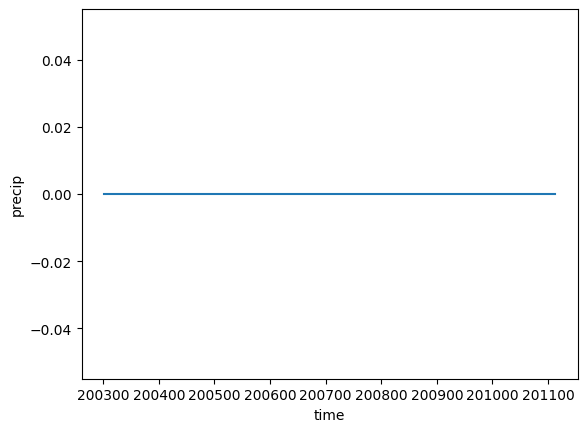

In [19]:
%matplotlib inline
plt.plot(df['time'].head(108),pxl)
plt.ylabel('precip')
plt.xlabel('time')

In [1]:
import numpy as np
col = np.load("../../data/column_names.npy")
col

array(['lat 0', 'lon 1', 'time 2', 'road_density 3', 'agb 4', 'sm 5',
       'pftCrop 6', 'pftHerb 7', 'pftShrubBD 8', 'pftShrubNE 9',
       'pftTreeBD 10', 'pftTreeBE 11', 'pftTreeND 12', 'pftTreeNE 13',
       'GDP_per_capita_PPP 14', 'ign 15', 'faPAR 16', 'LAI 17',
       'vod_K_anomalies 18', 'primn 19', 'pet 20', 'wet 21', 'precip 22',
       'pastr 23', 'Band1 24', 'pop_density 25',
       'Distance_to_populated_areas 26', 'Diurnal temperature range 27',
       'temp_max 28', 'Livestock 29'], dtype='<U30')

In [3]:
import pandas as pd
base = pd.read_csv("../../data/monthly_mean_base.csv")
base.head()

,pftCrop,pftShrubBD,ign,faPAR,precip,temp_max
0,0.002494,0.132951,0.0,0.250163,26.971376,-8.100000
1,0.000000,0.000780,0.0,0.000000,7.958032,-27.300001
2,0.728696,0.061289,5.0,0.395407,56.304527,33.500000
3,0.271573,0.134995,31.0,0.332775,0.007501,24.200001
4,0.000000,0.017966,0.0,0.000000,18.560972,-14.800000


In [4]:
base.shape[0]//(108)

24819

In [5]:
all = pd.read_csv("../../data/all_mean.csv")
all.columns

Index(['lat', 'lon', 'time', 'road_density', 'agb', 'sm', 'pftCrop ',
       'pftHerb', 'pftShrubBD', 'pftShrubNE', 'pftTreeBD', 'pftTreeBE',
       'pftTreeND', 'pftTreeNE', 'GDP', 'ign', 'faPAR', 'LAI',
       'vod_K_anomalies', 'primn', 'pet', 'wet', 'precip', 'pastr', 'Band1',
       'pop_density', 'Distance_to_populated_areas', 'dtr', 'tmax',
       'Livestock'],
      dtype='object')

In [6]:
all.shape

(244243, 30)

In [8]:
precip = all[['lat','lon','time','precip']]

In [9]:
precip

,lat,lon,time,precip
0,-55.75,-67.00,200707.0,69.128201
1,-55.50,-68.00,200707.0,63.122047
2,-55.50,-67.25,200707.0,55.862763
3,-55.25,-69.50,200707.0,58.967910
4,-55.25,-69.25,200707.0,57.485869
...,...,...,...,...
244238,83.50,-27.25,200707.0,20.249208
244239,83.50,-27.00,200707.0,20.311545
244240,83.75,-34.25,200707.0,18.302526
244241,83.75,-34.00,200707.0,18.359372


In [11]:
temp = all[['lat','lon','time','tmax']]

In [12]:
temp

,lat,lon,time,tmax
0,-55.75,-67.00,200707.0,8.475000
1,-55.50,-68.00,200707.0,8.428704
2,-55.50,-67.25,200707.0,8.475000
3,-55.25,-69.50,200707.0,7.910185
4,-55.25,-69.25,200707.0,8.099074
...,...,...,...,...
244238,83.50,-27.25,200707.0,-7.162963
244239,83.50,-27.00,200707.0,0.000000
244240,83.75,-34.25,200707.0,-15.305556
244241,83.75,-34.00,200707.0,-15.305556


Text(0.5, 0, 'time')

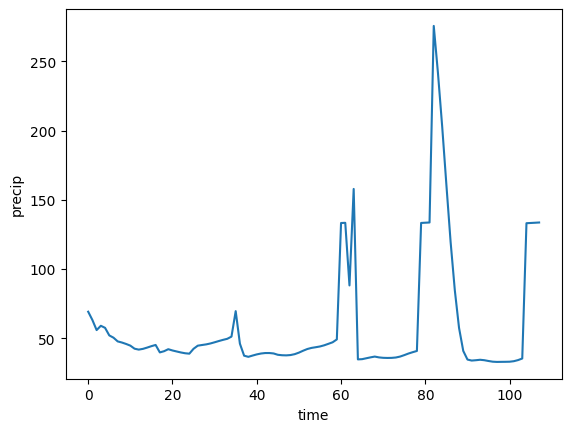

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline
pxl = precip['precip'].head(108)
plt.plot(pxl)
plt.ylabel('precip')
plt.xlabel('time')

In [18]:
244243*108

26378244

In [36]:
from netCDF4 import Dataset
testing = Dataset("../../data/grid.nc")


In [41]:
land = testing['subset_flag']

In [42]:
import pandas as pd
df = pd.read_pickle("../../data/anomaly.pkl")
df.columns

Index(['lat', 'lon', 'time', 'tmx', 'precip', 'detrended_temp', 'temp_a',
       'precip_a'],
      dtype='object')

In [44]:
df = df.drop(['detrended_temp'],axis = 1)

In [45]:
df.columns

Index(['lat', 'lon', 'time', 'tmx', 'precip', 'temp_a', 'precip_a'], dtype='object')

In [46]:
df_all = pd.read_pickle("../../data/dataset_subset_2003-2011.pkl")
df_all.columns

Index(['lat', 'lon', 'time', 'agb', 'pft_fracCover', 'sm', 'pftCrop',
       'pftHerb', 'pftShrubBD', 'pftShrubNE', 'pftTreeBD', 'pftTreeBE',
       'pftTreeND', 'pftTreeNE', 'GDP', 'ign', 'Distance_to_populated_areas',
       'fPAR', 'LAI', 'NLDI', 'vod_K_anomalies', 'FPAR_12mon', 'LAI_12mon',
       'Vod_k_anomaly_12mon', 'FPAR_06mon', 'LAI_06mon', 'Vod_k_anomaly_06mon',
       'WDPA_fracCover', 'dtr', 'pet', 'tmx', 'wet', 'Biome', 'precip',
       'Livestock', 'road_density', 'topo', 'pop_density'],
      dtype='object')

In [49]:
df_new = pd.concat([df,df_all[['agb', 'pft_fracCover', 'sm', 'pftCrop','pftHerb', 'pftShrubBD', 'pftShrubNE', 'pftTreeBD', 'pftTreeBE',
       'pftTreeND', 'pftTreeNE', 'GDP', 'ign', 'Distance_to_populated_areas',
       'fPAR','dtr', 'pet','wet', 'Biome','Livestock', 'road_density', 'topo', 'pop_density']]],axis = 1)

In [50]:
df_new.columns

Index(['lat', 'lon', 'time', 'tmx', 'precip', 'temp_a', 'precip_a', 'agb',
       'pft_fracCover', 'sm', 'pftCrop', 'pftHerb', 'pftShrubBD', 'pftShrubNE',
       'pftTreeBD', 'pftTreeBE', 'pftTreeND', 'pftTreeNE', 'GDP', 'ign',
       'Distance_to_populated_areas', 'fPAR', 'dtr', 'pet', 'wet', 'Biome',
       'Livestock', 'road_density', 'topo', 'pop_density'],
      dtype='object')

In [54]:
land = land[:]
type(land)

numpy.ma.core.MaskedArray

In [57]:
df_new.shape

(111974400, 30)

In [58]:
df_new.to_pickle("../../data/anomaly_all.pkl")

In [40]:
testing.variables

{'crs': <class 'netCDF4._netCDF4.Variable'>
 int32 crs()
     grid_mapping_name: latitude_longitude
     longitude_of_prime_meridian: 0.0
     semi_major_axis: 6378137.0
     inverse_flattening: 298.257223563
     ellipsoid_name: WGS84
 unlimited dimensions: 
 current shape = ()
 filling on, default _FillValue of -2147483647 used,
 'gpi': <class 'netCDF4._netCDF4.Variable'>
 int32 gpi(gp)
     long_name: Grid point index
     units: 
     valid_range: [      0 1036799]
 unlimited dimensions: 
 current shape = (1036800,)
 filling on, default _FillValue of -2147483647 used,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float64 lat(gp)
     long_name: Latitude
     units: degree_north
     standard_name: latitude
     valid_range: [-90.  90.]
 unlimited dimensions: 
 current shape = (1036800,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float64 lon(gp)
     long_name: Longitude
     units: degree_east
     standard_name: longi

In [1]:
import pandas as pd
df = pd.read_pickle("../../data/dataset_subset_2003-2011.pkl")
df.columns

Index(['lat', 'lon', 'time', 'agb', 'pft_fracCover', 'sm', 'pftCrop',
       'pftHerb', 'pftShrubBD', 'pftShrubNE', 'pftTreeBD', 'pftTreeBE',
       'pftTreeND', 'pftTreeNE', 'GDP', 'ign', 'Distance_to_populated_areas',
       'fPAR', 'LAI', 'NLDI', 'vod_K_anomalies', 'FPAR_12mon', 'LAI_12mon',
       'Vod_k_anomaly_12mon', 'FPAR_06mon', 'LAI_06mon', 'Vod_k_anomaly_06mon',
       'WDPA_fracCover', 'dtr', 'pet', 'tmx', 'wet', 'Biome', 'precip',
       'Livestock', 'road_density', 'topo', 'pop_density'],
      dtype='object')

In [2]:
arr = df.to_numpy()

In [3]:
arr.shape

(111974400, 38)

In [4]:
del(df)

In [2]:
from netCDF4 import Dataset
rf = Dataset("../../data/grid.nc")

In [3]:
mask = rf['subset_flag'][:]

In [4]:
import numpy as np
lat = rf['lat'][:]
lon = rf['lon'][:]
mask = np.array(mask)
lat = np.array(lat)
lon = np.array(lon)
lat = lat +.125
lon = lon + .125
land = np.where(mask==1)

In [7]:
land_coords = np.zeros((len(land[0]),2))
land_coords

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [17]:
lat = []
lon = []
for i in range(len(land[0])):
    coord = land[0][i]
    lat.append((((coord//720)-360)/4))
    lon.append((((coord%720)-720)/4))

In [15]:
((land[0][2]%720)-720)/4

-67.5

In [16]:
((((land[0][2]//720)-360)/4))

-21.5

In [19]:
coords = list(zip(lat,lon))
len(coords)

244243

In [20]:
land_coords = np.array(coords)

In [21]:
land_coords.shape

(244243, 2)

In [22]:
np.save("../../data/land_coords.npy",land_coords)

In [23]:
import pandas as pd
df = pd.read_pickle("../../data/dataset_subset_2003-2011.pkl")
df.columns

Index(['lat', 'lon', 'time', 'agb', 'pft_fracCover', 'sm', 'pftCrop',
       'pftHerb', 'pftShrubBD', 'pftShrubNE', 'pftTreeBD', 'pftTreeBE',
       'pftTreeND', 'pftTreeNE', 'GDP', 'ign', 'Distance_to_populated_areas',
       'fPAR', 'LAI', 'NLDI', 'vod_K_anomalies', 'FPAR_12mon', 'LAI_12mon',
       'Vod_k_anomaly_12mon', 'FPAR_06mon', 'LAI_06mon', 'Vod_k_anomaly_06mon',
       'WDPA_fracCover', 'dtr', 'pet', 'tmx', 'wet', 'Biome', 'precip',
       'Livestock', 'road_density', 'topo', 'pop_density'],
      dtype='object')

In [27]:
df.drop(["LAI",'NLDI','FPAR_12mon','LAI_12mon','Vod_k_anomaly_12mon','FPAR_06mon','LAI_06mon','Vod_k_anomaly_06mon'],axis = 1,inplace=True)

In [30]:
df.columns

Index(['lat', 'lon', 'time', 'agb', 'pft_fracCover', 'sm', 'pftCrop',
       'pftHerb', 'pftShrubBD', 'pftShrubNE', 'pftTreeBD', 'pftTreeBE',
       'pftTreeND', 'pftTreeNE', 'GDP', 'ign', 'Distance_to_populated_areas',
       'fPAR', 'vod_K_anomalies', 'WDPA_fracCover', 'dtr', 'pet', 'tmx', 'wet',
       'Biome', 'precip', 'Livestock', 'road_density', 'topo', 'pop_density'],
      dtype='object')

In [9]:
import pandas as pd
arr = pd.read_pickle("../../data/dataset_subset_2003-2011.pkl")
arr = arr.to_numpy()

In [10]:
cols = ['lat', 'lon', 'time', 'agb', 'pft_fracCover', 'sm', 'pftCrop',
       'pftHerb', 'pftShrubBD', 'pftShrubNE', 'pftTreeBD', 'pftTreeBE',
       'pftTreeND', 'pftTreeNE', 'GDP', 'ign', 'Distance_to_populated_areas',
       'fPAR', 'LAI', 'NLDI', 'vod_K_anomalies', 'FPAR_12mon', 'LAI_12mon',
       'Vod_k_anomaly_12mon', 'FPAR_06mon', 'LAI_06mon', 'Vod_k_anomaly_06mon',
       'WDPA_fracCover', 'dtr', 'pet', 'tmx', 'wet', 'Biome', 'precip',
       'Livestock', 'road_density', 'topo', 'pop_density']

In [14]:
cols[18]
#18-26

'LAI'

In [17]:
cols[26]

'Vod_k_anomaly_06mon'

In [19]:
len(cols)-9

29

We will need to seperate between static and anomaly data, anomaly would imply temp, precip, sm, fapar, dtr, wet, pet

180.0